35 35 15 15


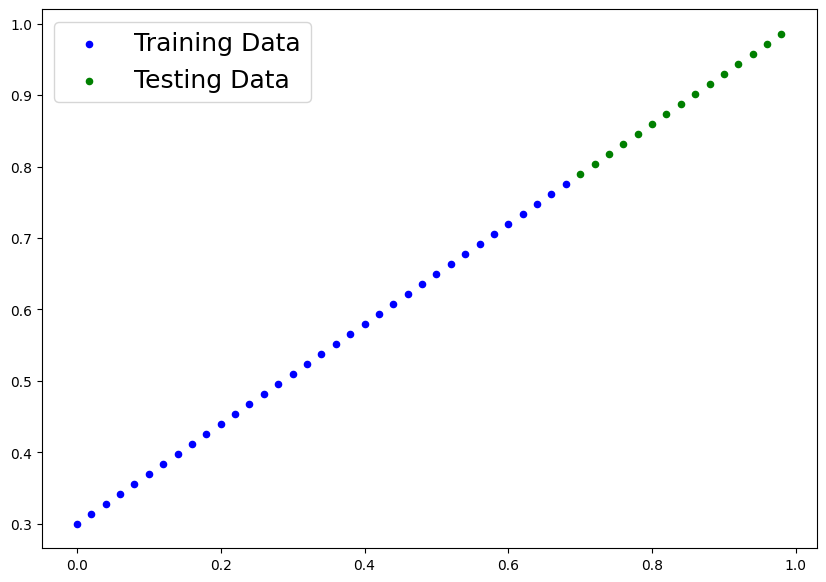

In [1]:
import torch
import matplotlib.pyplot as plt
weights=0.7
bias=0.3
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weights*X+bias
#Spliting the Data into the two sets Train and  Test
split_data=int(0.7*len(X))
X_Train=X[:split_data]
y_Train=y[:split_data]
X_Test=X[split_data:]
y_Test=y[split_data:]
print(len(X_Train),len(y_Train),len(X_Test),len(y_Test))
def plot_prediction(Train_data=X_Train,
                    Train_label=y_Train,
                    Test_data=X_Test,
                    Test_label=y_Test,
                    prediction=None
                    ):
    plt.figure(figsize=(10,7))
    plt.scatter(Train_data,Train_label,c="b",s=20,label="Training Data")
    plt.scatter(Test_data,Test_label,c="g",s=20,label="Testing Data")
    if prediction is not None:
        plt.plot(Test_data,prediction,c="r",s=20,label="Prediction")
    plt.legend(prop={"size":18})
    plt.show()
plot_prediction()

In [2]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    def forward(self,x:torch.Tensor)-> torch.Tensor:
        return self.weights*x+self.bias

In [3]:
torch.manual_seed(42)
#creating the instance of the model
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [4]:
#List named Parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [5]:
with torch.inference_mode():
    pd=model_0(X_Test)


In [6]:
#check the Predictions
print(f'Number of Testing the Sampels are {len(X_Test)}')
print(f'Number Training Samples are {len(X_train)}')
print(f'Prediction of the Model is:\n {pd}')

Number of Testing the Sampels are 15


NameError: name 'X_train' is not defined

AttributeError: Line2D.set() got an unexpected keyword argument 's'

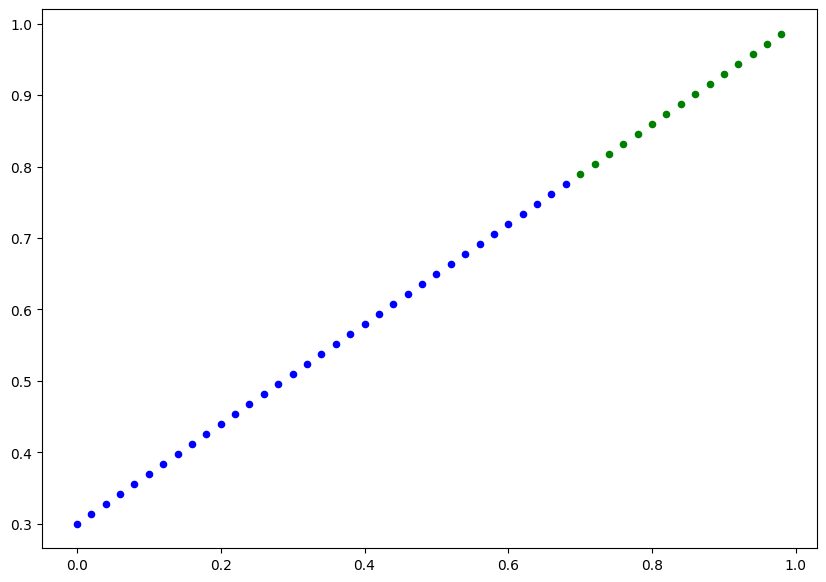

In [9]:
plot_prediction(prediction=pd)

In [9]:
#Finding the  Loss
y_Test-pd

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [10]:
#create the Loss Functions
loss_fn=nn.L1Loss()#L1Loss() is Same as MAE...
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [11]:
torch.manual_seed(42)
epochs=100
#creating the empty loss list to track values
train_loss_values=[]
test_loss_values=[]
epoch_count=[]
for epoch in range(epochs):
    model_0.train()
    pd=model_0(X_train)
    loss=loss_fn(pd,y_train)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_pd=model_0(X_Test)
        Test_loss=loss_fn(test_pd,y_Test.type(torch.float))

        if epoch % 10==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(loss.detach().numpy())
            print(f"Epoch:{epoch},\nMAE Train loss :{loss},\nMAE Test Loss :{Test_loss}")



Epoch:0,
MAE Train loss :0.31288138031959534,
MAE Test Loss :0.48106518387794495
Epoch:10,
MAE Train loss :0.1976713240146637,
MAE Test Loss :0.3463551998138428
Epoch:20,
MAE Train loss :0.08908725529909134,
MAE Test Loss :0.21729660034179688
Epoch:30,
MAE Train loss :0.053148526698350906,
MAE Test Loss :0.14464017748832703
Epoch:40,
MAE Train loss :0.04543796554207802,
MAE Test Loss :0.11360953003168106
Epoch:50,
MAE Train loss :0.04167863354086876,
MAE Test Loss :0.09919948130846024
Epoch:60,
MAE Train loss :0.03818932920694351,
MAE Test Loss :0.08886633068323135
Epoch:70,
MAE Train loss :0.03476089984178543,
MAE Test Loss :0.0805937647819519
Epoch:80,
MAE Train loss :0.03132382780313492,
MAE Test Loss :0.07232122868299484
Epoch:90,
MAE Train loss :0.02788739837706089,
MAE Test Loss :0.06473556160926819
